# Airline Passenger Analysis

## Data set available on Kaggle.com

### Importing important libraries to analyse and visualize on the fly.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading dataset using read function

In [2]:
df= pd.read_csv('./airline_passenger_satisfaction.csv')

### Exploring Dataset - 
#### 1.Checking for anomalies in the data set such as null/missing values.
#### 2- Total Records
#### 3- Total columns, Datatypes of columns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

#### All columns are good with values except Arrival Delay, which has null values. We will explore the column more and will judge whether to fill in values or delete the rows with null values.

### Checking null values found in Arrival Delay Columns

In [4]:
df.loc[df['Arrival Delay'].isnull()]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


#### We have 393 rows as null, compare to 120k rows, 393 is a small amount, we can delete them but today we will try to fix it.
##### Being out number with a large margin, we can find the mean of larger part and then update the mean value in 393 rows.

In [19]:
# find the mean of arrival delay
df['Arrival Delay'].mean()

15.09112883918849

#### Mean value for Arrival delay comes out to me 15.09 minutes. Consider 15 minutes.

### Exploring the column values more using box plot

<AxesSubplot:>

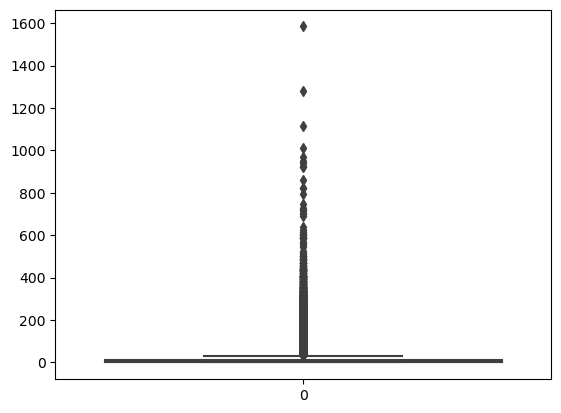

In [7]:
# lets check the upper and lower limits of arrival delay
sns.boxplot(data = df['Arrival Delay'])

#### The box plot higlights many outliers, however when compared to 120 records, it can be concluded that these outliers may not be due to any error. Flights do get delayed by days in case of natural calamities, such are Cyclones, Volcanic eruptions, to reach their destinations.

### Further investigating, found 75% values are having delay time of around 13 minutes.

In [8]:
# interesting, lets dive more into the arrival delay part
df['Arrival Delay'].describe()
# here 75% values are <= 13 minutes. 

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

### Lets substitute the mean value in all null values for the arrival delay.

In [21]:
df['Arrival Delay'].fillna(15 ,inplace = True)

<AxesSubplot:>

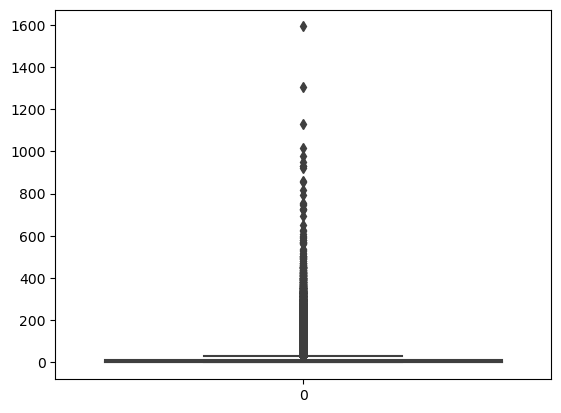

In [26]:
sns.boxplot(data = df['Departure Delay'])

#### Departure delay follows the same trend with the values.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### So the nuls are fixed now, Data types are ideal for all columns,  we now will move further to our EDA part.

#### Options set to view all columns.

In [12]:
pd.set_option('display.max_columns', 24)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,1,4,4,5,3,3,4,5,3,5,Satisfied


### Columns excluding ratings and delay arrival/departure, seems to be categorical. Lets check if the values in them have any error.


In [13]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [14]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [15]:
df['Customer Type'].value_counts()

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

In [16]:
df['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

In [17]:
df['Class'].value_counts()

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

In [18]:
df['Flight Distance'].value_counts()

337     841
594     505
404     480
862     473
2475    470
       ... 
1492      1
815       1
1293      1
1196      1
1051      1
Name: Flight Distance, Length: 3821, dtype: int64

In [19]:
pd.set_option('display.max_rows',100)
df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

### All variables are in perfect shape for the EDA

In [20]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,3,4,4,5,4,3,3,3,3,Satisfied


## @ Let's see the distribution of Customer type

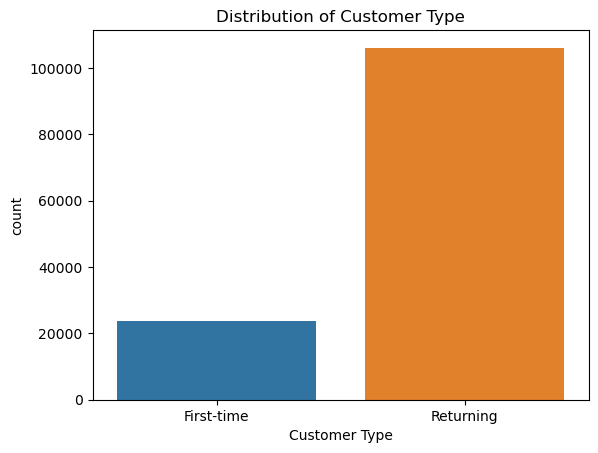

In [24]:

plt.title('Distribution of Customer Type')
sns.countplot(x='Customer Type', data = df)
plt.show()

#### Can see the returning passengers are 4 times of first timers

## @ Chekcing distribution of customer type based on gender. 

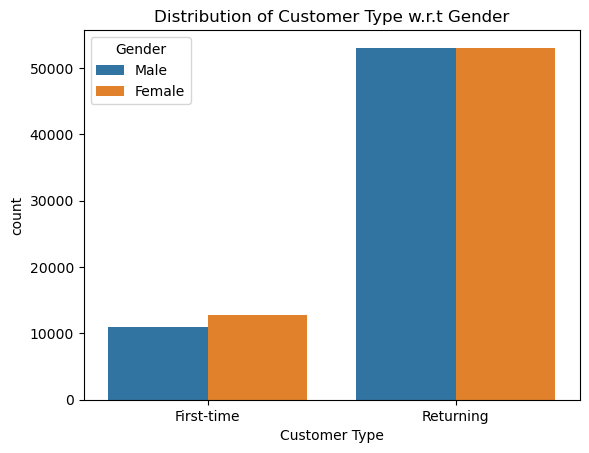

In [27]:

plt.title('Distribution of Customer Type w.r.t Gender')
sns.countplot(data = df, x='Customer Type',hue= 'Gender')
plt.show()



#### Males and females both tends equally to fly with Airline
#### No major difference can be seen.

In [28]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

## @ Checking the age distribution in customers.


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

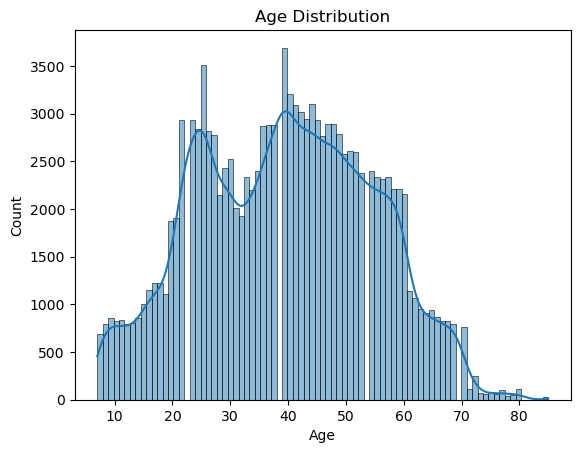

In [11]:
plt.title('Age Distribution')
sns.histplot(data= df, x= 'Age', kde=True)



#### Majority of travellers fall into age group between early 20s and 60 years.

## @ Distribution of age w.r.t to gender.


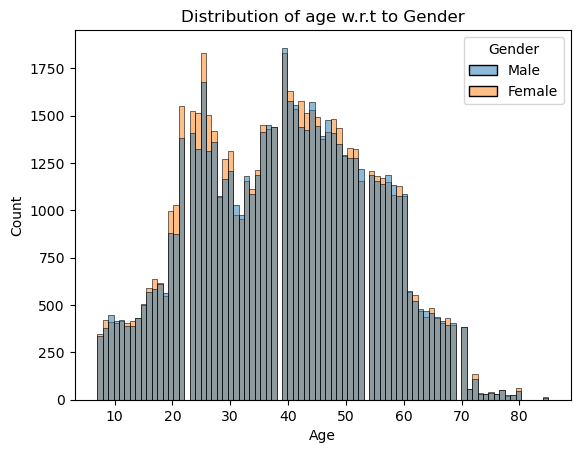

In [30]:
plt.title('Distribution of age w.r.t to Gender')
sns.histplot(data= df, x= 'Age',hue='Gender')
plt.show()


#### Majority of travellers are in age ranges of 20-30years and 40-60 years.
#### Females are in majority.

## @ Distribution of customer type w.r.t  Age.


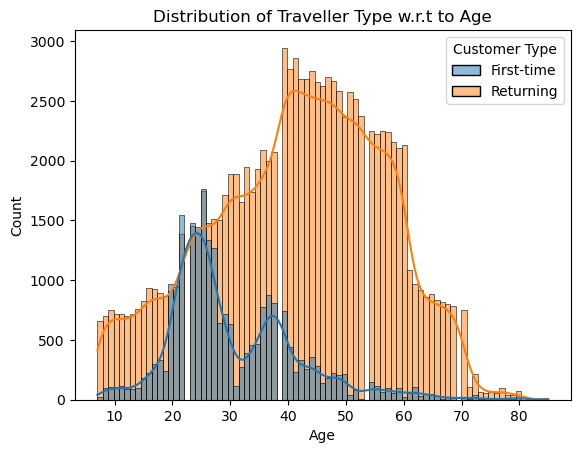

In [36]:
plt.title('Distribution of Traveller Type w.r.t to Age')
sns.histplot(data= df, x= 'Age',hue='Customer Type', kde= True)
plt.show()


#### First timers are in the age group of 19-26. Special offers can be made for youngesters in this age group.
#### Airline is a preference of people belonging to all age groups.

##  @ Checking the age group according to the type of travel.


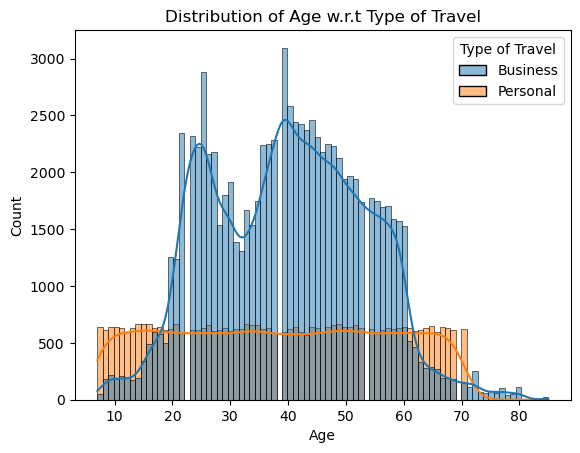

In [13]:
plt.title('Distribution of Age w.r.t Type of Travel')
sns.histplot(data= df, x='Age', hue= 'Type of Travel', kde= True)
plt.show()

#### Age group between 20-60 has a higher possibility to travel for a busniess purpose.
#### Travellers using airline for personal purpose seems to have equall distribution w.r.t age.

## @ Countplot for Type of travel.


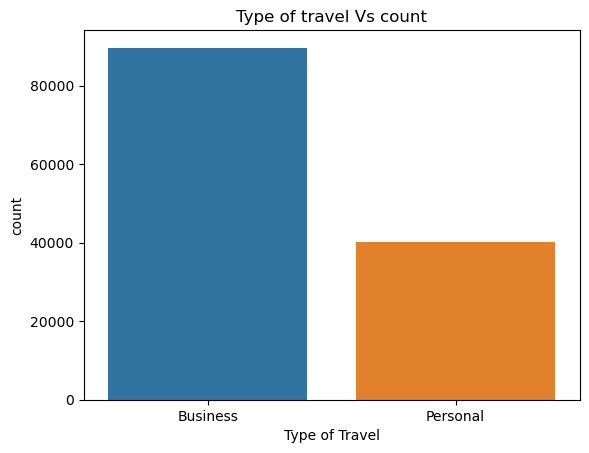

In [15]:
plt.title('Type of travel Vs count')
sns.countplot(data=df, x= 'Type of Travel')
plt.show()

#### Airline is used for business purpose more than twice as much as for personal purpose by almost all age groups.

## @ Type of Travel Vs Gender.

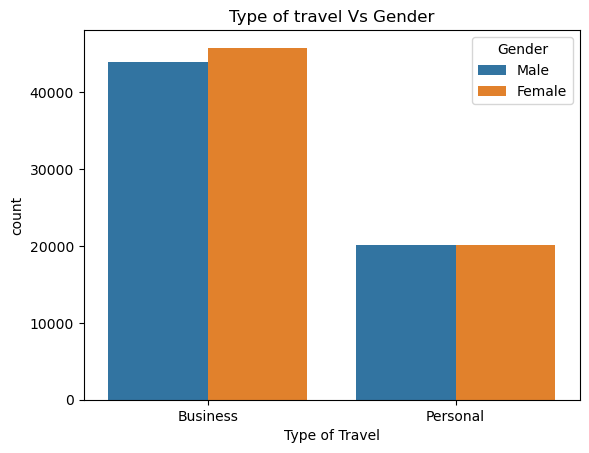

In [48]:
plt.title('Type of travel Vs Gender')
sns.countplot(data= df, x='Type of Travel', hue= 'Gender')
plt.show()

#### Women are using airline for business purpose more than the males. 
#### Personal Use have similar count for both the Gender.

## @ Travelling class Vs Gender.


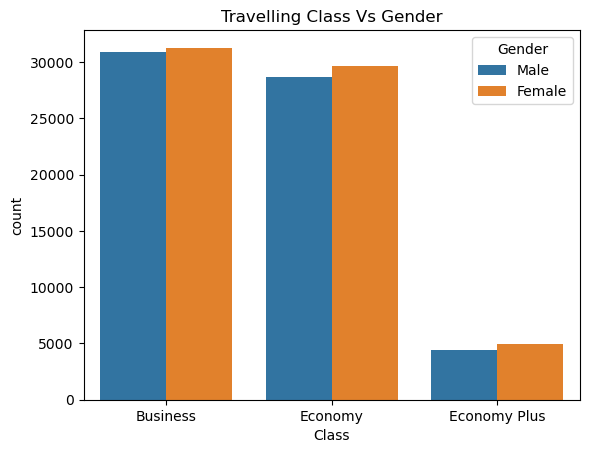

In [57]:
plt.title('Travelling Class Vs Gender')
sns.countplot(data= df, x='Class', hue= 'Gender')
plt.show()

#### Almost equal numbers of passengers from both genders are travelling through each seating class in Airline. No specific trend found.
#### Economy class is very less preferrable

## @ Travelling class Vs Age.


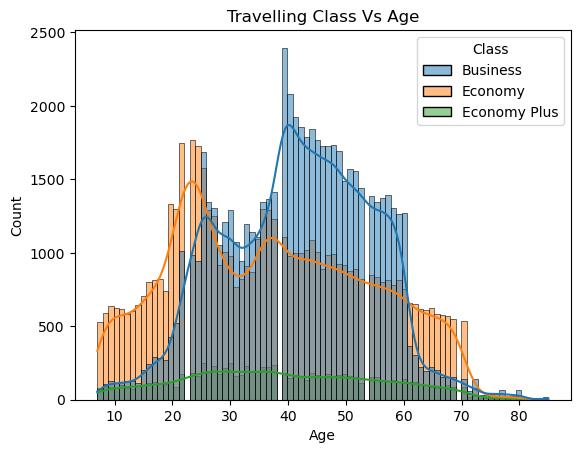

In [59]:
plt.title('Travelling Class Vs Age')
sns.histplot(data=df, x='Age', hue= 'Class', kde= True)
plt.show()

#### Age group between 30-60 is more likely to travel business class.
#### Economy class is much popular in travellers having age less than 24 and greater than 60
#### Economy Plus attracts very less travellers among all age group.

## @ Travel class among type of travellers.


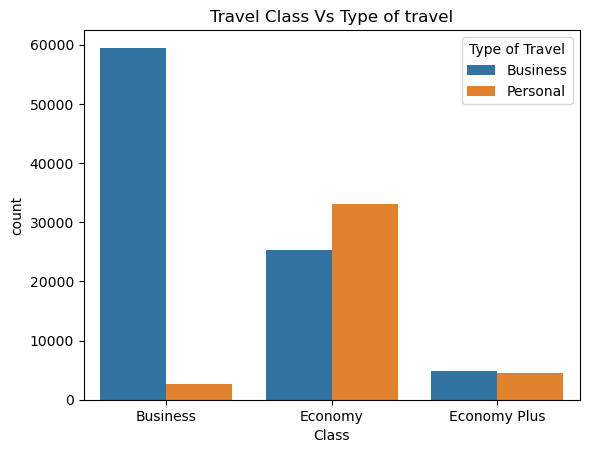

In [33]:
plt.title('Travel Class Vs Type of travel')
sns.countplot(data=df, x='Class', hue= 'Type of Travel')
plt.show()

#### Business class is mostly use for business purpose trips,
#### Economy is preferred over economy plus class for both business & personal travel.


## @ Customer type Vs Seating Class.

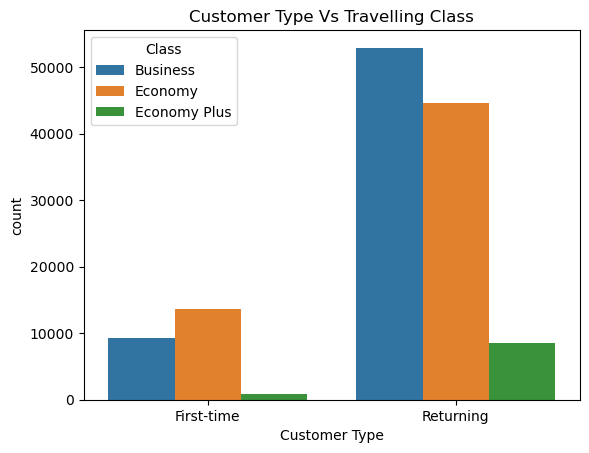

In [76]:
plt.title('Customer Type Vs Travelling Class')
sns.countplot(data=df,x='Customer Type',hue= 'Class')
plt.show()

#### Returning travellers more likely to choose Business class, than Economy
#### Economy Plus is rarely used by first time travellers.

## @ Age Vs Distance travelled w.r.t Gender


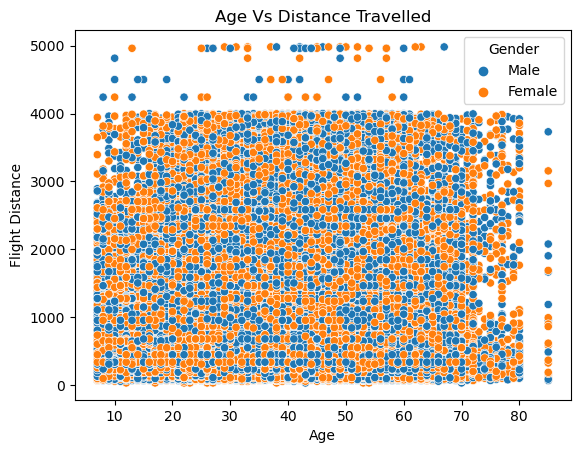

In [34]:
plt.title('Age Vs Distance Travelled')
sns.scatterplot(data=df, x= 'Age',y='Flight Distance', hue='Gender')
plt.show()

In [38]:
df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

#### Majority of passengers are travellling as much as 1800 miles. Airline as more domestic passengers than International.
#### 25% passengers travelling between 2000 and 5000 miles.

## @ Traveller type Vs Type of Travel.

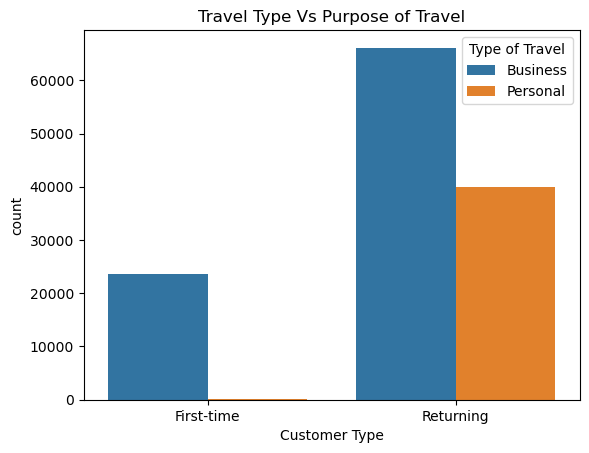

In [79]:
plt.title('Travel Type Vs Purpose of Travel')
sns.countplot(data=df, x='Customer Type', hue='Type of Travel')
plt.show()

#### First time user is mostly using Airline for business purpose.
#### Overall, airline is mostly used for business purpose compared to personal purpose.
#### Number of passengers as first timers are significantly low in number for personal use.

### We have till now cross investigated all categorical columns with respect to each other. Founds insights and reported.
### Checking other variables as well now.

## @ Average Arrival and Departure Delay

In [66]:
Arrival= df['Arrival Delay'].mean()
departure= df['Departure Delay'].mean()
print(f'Average delay in arival is {Arrival}')
print(f'Average delay in departure is {departure}')

Average delay in arival is 15.090853095164768
Average delay in departure is 14.713712657838004


#### If there is not an emergency situation, then average delay times are under control.

## Checking the values for Satisfaction.

In [67]:
df['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [40]:
df.Satisfaction.value_counts()*100 / len(df)


Neutral or Dissatisfied    56.553742
Satisfied                  43.446258
Name: Satisfaction, dtype: float64

#### Disatisfied passengers are having higher percentage.

## @ Checking values for the satisfaction rating

In [75]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.090853,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Assuming 3.3 as the average rating below which improvement is required.
### Variables such as - Ease of Online Booking, Gate Location, In-flight Wifi Service, Departure and Arrival Time Convenience, Online Boarding,Cleanliness,Food and Drink needs improvement.
### Looking at the numbers, these columns also have maximum rating as 5 and 75 percentile people have rated 4, thus it can be concluded than with little improvement in the service under the unbrella of such factors, Overall Satisfaction rate will be improved drastically.


In [25]:
df.to_csv('../Airline Analysis/cleaned_dataset.csv')

## Saving the file as csv format to use in Tableau for dashboard.